In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HKUTG 2025 Fall Recruitment_Quant_Developer Track_Data File.csv")
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

<Figure size 1400x800 with 0 Axes>

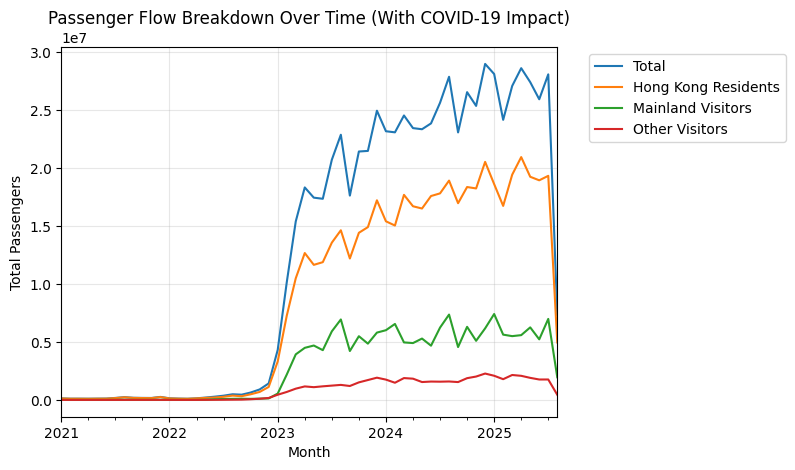

In [3]:
# OOVID-19 Analysis, is there an impact of COVID-19 on passenger flow?
data['Year_Month'] = data['Date'].dt.to_period('M')
monthly_analysis = data.groupby('Year_Month').agg({
    'Total': 'sum',
    'Hong Kong Residents': 'sum',
    'Mainland Visitors': 'sum',
    'Other Visitors': 'sum'
})

plt.figure(figsize=(14,8))
monthly_analysis.plot(kind='line')
plt.title("Passenger Flow Breakdown Over Time (With COVID-19 Impact)")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

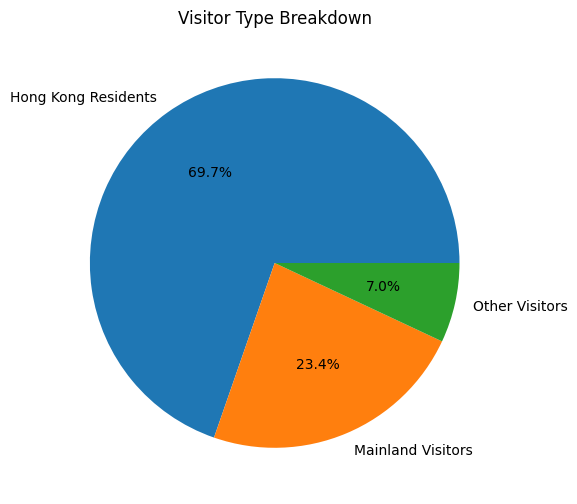

In [4]:
visitor_types = data[['Hong Kong Residents','Mainland Visitors','Other Visitors']].sum()

plt.figure(figsize=(6,6))
visitor_types.plot(kind='pie', autopct='%1.1f%%')
plt.title("Visitor Type Breakdown")
plt.ylabel("")
plt.show()

In [5]:
# Mainland to Hong Kong ratio for every year
years = [2021, 2022, 2023, 2024, 2025]

print("Mainland/HK Resident Ratio by Year:")
print("=" * 40)

for year in years:
    year_data = data[data['Date'].dt.year == year]
    
    mainland_total = year_data['Mainland Visitors'].sum()
    hk_total = year_data['Hong Kong Residents'].sum()

    ratio = mainland_total / hk_total
    print(f"{year}: {ratio:.3f} ({mainland_total:,} mainland / {hk_total:,} HK)")
        

Mainland/HK Resident Ratio by Year:
2021: 0.062 (109,618 mainland / 1,763,814 HK)
2022: 0.178 (733,791 mainland / 4,112,894 HK)
2023: 0.370 (53,309,028 mainland / 144,028,410 HK)
2024: 0.325 (68,065,179 mainland / 209,510,428 HK)
2025: 0.322 (44,504,883 mainland / 138,024,014 HK)


In [13]:
# Mainland/HK ratio at each control point?
cp_ratios = data.groupby('Control Point').agg({
    'Mainland Visitors': 'sum',
    'Hong Kong Residents': 'sum'
}).assign(Mainland_to_HK_Ratio = lambda x: x['Mainland Visitors'] / x['Hong Kong Residents'])

print("Mainland/HK Ratio by Control Point:")
print("=" * 50)

for cp, ratio in cp_ratios['Mainland_to_HK_Ratio'].sort_values(ascending=False).items():
    print(f"{cp}: {ratio:.3f}")

Mainland/HK Ratio by Control Point:
Express Rail Link West Kowloon: 1.086
China Ferry Terminal: 0.862
Shenzhen Bay: 0.371
Kai Tak Cruise Terminal: 0.362
Hong Kong-Zhuhai-Macao Bridge: 0.330
Lok Ma Chau: 0.302
Lok Ma Chau Spur Line: 0.297
Man Kam To: 0.295
Airport: 0.291
Macau Ferry Terminal: 0.242
Heung Yuen Wai: 0.240
Lo Wu: 0.232
Harbour Control: 0.106
Hung Hom: nan
Sha Tau Kok: nan
Tuen Mun Ferry Terminal: nan


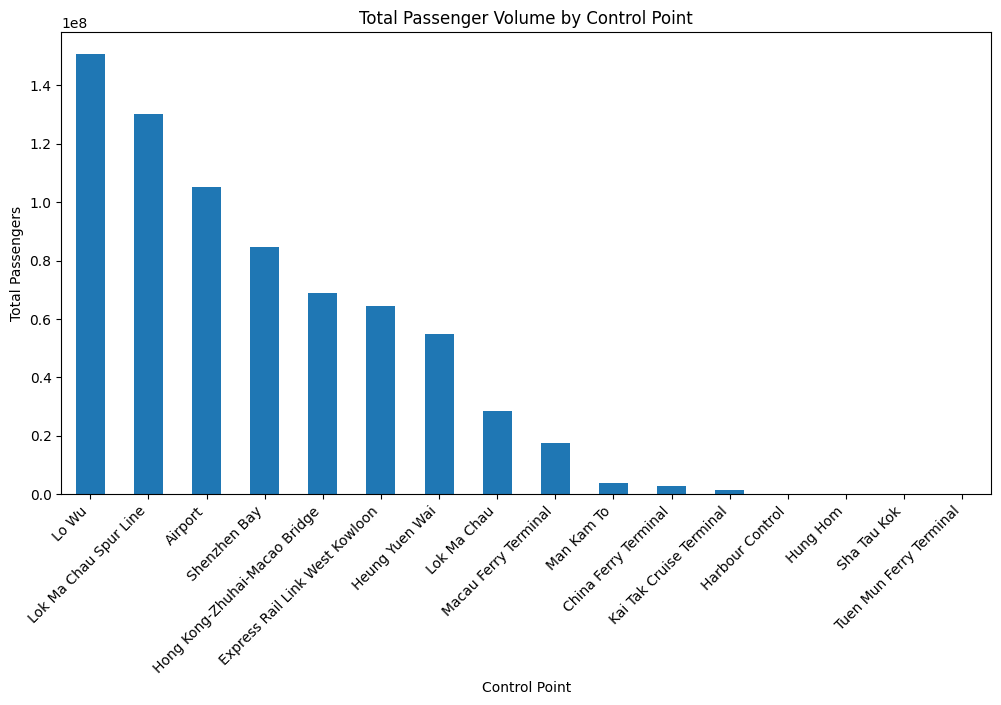

Top 3 busiest control points:
Control Point
Lo Wu                    150702981
Lok Ma Chau Spur Line    130344046
Airport                  105348016
Name: Total, dtype: int64


All control points volume:
Control Point
Lo Wu                             150702981
Lok Ma Chau Spur Line             130344046
Airport                           105348016
Shenzhen Bay                       84615245
Hong Kong-Zhuhai-Macao Bridge      68983692
Express Rail Link West Kowloon     64316262
Heung Yuen Wai                     55036779
Lok Ma Chau                        28652492
Macau Ferry Terminal               17709373
Man Kam To                          3695982
China Ferry Terminal                2870951
Kai Tak Cruise Terminal             1569648
Harbour Control                       85232
Hung Hom                                  0
Sha Tau Kok                               0
Tuen Mun Ferry Terminal                   0
Name: Total, dtype: int64


In [7]:
# Total volume at each control point
control_point_totals = data.groupby('Control Point')['Total'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
control_point_totals.plot(kind='bar')
plt.title("Total Passenger Volume by Control Point")
plt.xlabel("Control Point")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top 3 busiest control points:")
print(control_point_totals.head(3))
print("\n")
print("All control points volume:")
print(control_point_totals)

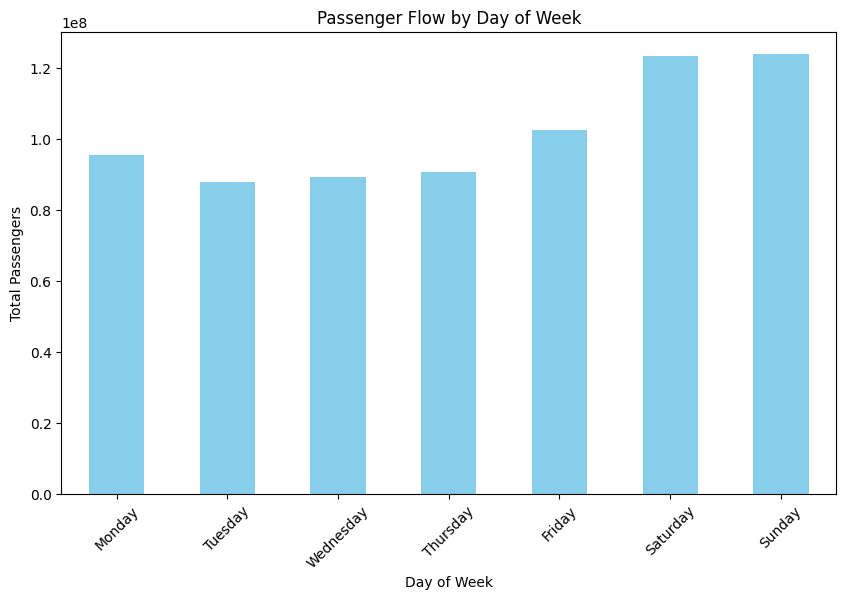

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['Weekday'] = data['Date'].dt.day_name()
weekday_totals = data.groupby('Weekday')['Total'].sum()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_totals = weekday_totals.reindex(weekday_order)

plt.figure(figsize=(10,6))
weekday_totals.plot(kind='bar', color='skyblue')
plt.title("Passenger Flow by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

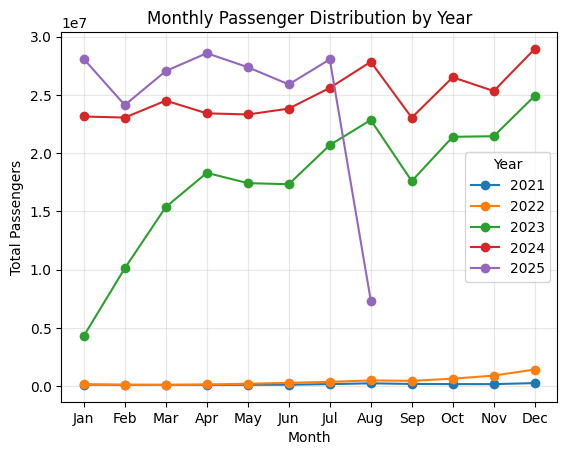

Monthly totals by year:
Date      2021       2022        2023        2024        2025
Date                                                         
1     133989.0   141534.0   4310527.0  23144792.0  28076229.0
2     109800.0   116716.0  10117848.0  23050824.0  24126685.0
3     110791.0   103439.0  15375748.0  24503737.0  27046139.0
4     106368.0   140545.0  18305258.0  23414851.0  28577548.0
5     114134.0   204772.0  17424364.0  23317934.0  27374566.0
6     119914.0   280451.0  17328211.0  23821632.0  25899301.0
7     172816.0   366083.0  20688554.0  25597246.0  28046349.0
8     240201.0   489182.0  22843045.0  27836858.0   7348131.0
9     187136.0   453747.0  17600012.0  23042398.0         NaN
10    175413.0   638449.0  21399492.0  26511972.0         NaN
11    169930.0   904503.0  21450928.0  25327649.0         NaN
12    260647.0  1422736.0  24914456.0  28944119.0         NaN


In [9]:
# Monthly passenger distribution by year
monthly_by_year = data.groupby([data['Date'].dt.year, data['Date'].dt.month])['Total'].sum().unstack(level=0)

plt.figure(figsize=(12,6))
monthly_by_year.plot(kind='line', marker='o')
plt.title("Monthly Passenger Distribution by Year")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.legend(title="Year")
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, alpha=0.3)
plt.show()

print("Monthly totals by year:")
print(monthly_by_year)

<Figure size 1000x600 with 0 Axes>

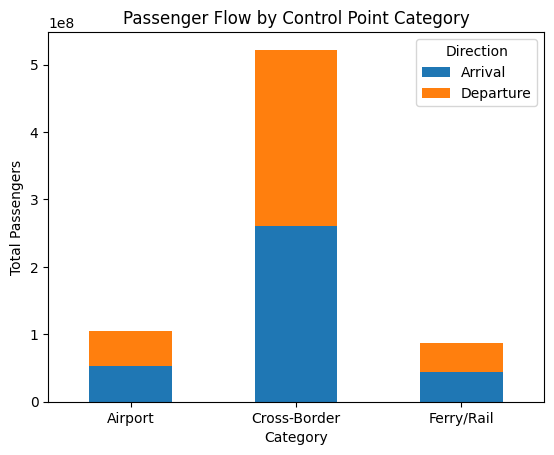

In [10]:
# Arrival vs departure ratio, grouped by category (airport, cross-border, ferry/rail)
airport_points = ['Airport']
cross_border_points = ['Shenzhen Bay', 'Hong Kong-Zhuhai-Macao Bridge', 'Lo Wu', 
                      'Lok Ma Chau', 'Lok Ma Chau Spur Line', 'Man Kam To', 
                      'Sha Tau Kok', 'Heung Yuen Wai']

data['Category'] = data['Control Point'].apply(
    lambda x: 'Airport' if x in airport_points 
    else 'Cross-Border' if x in cross_border_points 
    else 'Ferry/Rail'
)

category_analysis = data.groupby(['Category', 'Arrival / Departure'])['Total'].sum().unstack()

plt.figure(figsize=(10,6))
category_analysis.plot(kind='bar', stacked=True)
plt.title("Passenger Flow by Control Point Category")
plt.xlabel("Category")
plt.ylabel("Total Passengers")
plt.legend(title="Direction")
plt.xticks(rotation=0)
plt.show()